<a href="https://colab.research.google.com/github/haronghatong/private_project/blob/main/%EB%B9%85%EB%B6%84_%EB%AF%B8%EC%84%B8%EB%A8%BC%EC%A7%80(%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 한글 폰트 설치 (Nanum Gothic)
!apt-get -qq -y install fonts-nanum

# 한글 폰트 확인
import matplotlib.font_manager as fm
# Call the public method to update the font cache
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf') # This assumes NanumGothic.ttf is the font file name. You might need to adjust the path.

# 설치된 폰트 확인
for font in fm.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name)


import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic')

Selecting previously unselected package fonts-nanum.
(Reading database ... 123630 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
NanumGothic


#데이터 불러오기

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 경기도대기환경정보일평균자료.csv to 경기도대기환경정보일평균자료.csv


In [ ]:
import pandas as pd

# 인코딩을 지정하여 파일 읽기
df = pd.read_csv('경기도대기환경정보일평균자료.csv', encoding='cp949')

# 데이터 확인
print(df.head())

   도시명 측정장소명      측정일자  PM10측정값(㎍/㎥)  PM25측정값(㎍/㎥)
0  수원시   인계동  20230128          37.0          13.0
1  수원시   인계동  20230129          46.0          16.0
2  수원시   인계동  20230130          44.0          18.0
3  수원시   인계동  20230131          38.0          16.0
4  수원시   인계동  20230201          63.0          30.0


# 데이터 전처리

In [ ]:
import pandas as pd

# 측정일자를 datetime 형식으로 변환
df['측정일자'] = pd.to_datetime(df['측정일자'], format='%Y%m%d')

# 변환된 데이터 확인
print(df.head())


   도시명 측정장소명       측정일자  PM10측정값(㎍/㎥)  PM25측정값(㎍/㎥)
0  수원시   인계동 2023-01-28          37.0          13.0
1  수원시   인계동 2023-01-29          46.0          16.0
2  수원시   인계동 2023-01-30          44.0          18.0
3  수원시   인계동 2023-01-31          38.0          16.0
4  수원시   인계동 2023-02-01          63.0          30.0


In [ ]:
# 평균으로 대체
df['PM10측정값(㎍/㎥)'].fillna(df['PM10측정값(㎍/㎥)'].mean(), inplace=True)

# 중앙값으로 대체
df['PM25측정값(㎍/㎥)'].fillna(df['PM25측정값(㎍/㎥)'].median(), inplace=True)

# 지정된 값으로 대체
df.fillna(0, inplace=True)


<ipython-input-5-b61fda912da5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['PM10측정값(㎍/㎥)'].fillna(df['PM10측정값(㎍/㎥)'].mean(), inplace=True)
<ipython-input-5-b61fda912da5>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

In [ ]:
df.isnull().sum()

,0
도시명,0
측정장소명,0
측정일자,0
PM10측정값(㎍/㎥),0
PM25측정값(㎍/㎥),0


In [ ]:
# 데이터 타입 확인
print(df.dtypes)

# 변환 예시: 수치형으로 변환
df['PM10측정값(㎍/㎥)'] = pd.to_numeric(df['PM10측정값(㎍/㎥)'], errors='coerce')
df['PM25측정값(㎍/㎥)'] = pd.to_numeric(df['PM25측정값(㎍/㎥)'], errors='coerce')

도시명                     object
측정장소명                   object
측정일자            datetime64[ns]
PM10측정값(㎍/㎥)           float64
PM25측정값(㎍/㎥)           float64
dtype: object


In [ ]:
df.head()

,도시명,측정장소명,측정일자,PM10측정값(㎍/㎥),PM25측정값(㎍/㎥)
0,수원시,인계동,2023-01-28,37.0,13.0
1,수원시,인계동,2023-01-29,46.0,16.0
2,수원시,인계동,2023-01-30,44.0,18.0
3,수원시,인계동,2023-01-31,38.0,16.0
4,수원시,인계동,2023-02-01,63.0,30.0


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
suwon_data = df[df['도시명'] == '수원시'].copy()
suwon_data = suwon_data.sort_values(by=['측정장소명', '측정일자'])

# 이상치 제거 예제 (IQR 사용)
Q1 = suwon_data['PM10측정값(㎍/㎥)'].quantile(0.25)
Q3 = suwon_data['PM10측정값(㎍/㎥)'].quantile(0.75)
IQR = Q3 - Q1
suwon_data = suwon_data[(suwon_data['PM10측정값(㎍/㎥)'] >= Q1 - 1.5 * IQR) &
                        (suwon_data['PM10측정값(㎍/㎥)'] <= Q3 + 1.5 * IQR)]


In [ ]:
suwon_data = df[df['도시명'] == '수원시'].copy()
suwon_data = suwon_data.sort_values(by=['측정장소명', '측정일자'])

# 이상치 제거 예제 (IQR 사용)
Q2 = suwon_data['PM25측정값(㎍/㎥)'].quantile(0.25)
Q4 = suwon_data['PM25측정값(㎍/㎥)'].quantile(0.75)
IQR = Q4 - Q2
suwon_data = suwon_data[(suwon_data['PM25측정값(㎍/㎥)'] >= Q2 - 1.5 * IQR) &
                        (suwon_data['PM25측정값(㎍/㎥)'] <= Q4 + 1.5 * IQR)]


In [ ]:
suwon_data.head()

,도시명,측정장소명,측정일자,PM10측정값(㎍/㎥),PM25측정값(㎍/㎥)
2885,수원시,경수대로,2023-01-02,30.0,13.0
2886,수원시,경수대로,2023-01-03,35.0,20.0
2887,수원시,경수대로,2023-01-04,40.0,25.0
2888,수원시,경수대로,2023-01-05,59.0,41.0
2892,수원시,경수대로,2023-01-09,97.0,38.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# 스케일링 대상 열
columns_to_scale = ['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']

# 스케일러 초기화
scaler = MinMaxScaler(feature_range=(0, 1))

# 스케일링 수행
scaled_values = scaler.fit_transform(suwon_data[columns_to_scale])

# 스케일링된 값을 원본 데이터프레임에 다시 삽입
suwon_data[columns_to_scale] = scaled_values

# 결과 확인
print(suwon_data.head())


      도시명 측정장소명       측정일자  PM10측정값(㎍/㎥)  PM25측정값(㎍/㎥)
2885  수원시  경수대로 2023-01-02      0.090909      0.276596
2886  수원시  경수대로 2023-01-03      0.107143      0.425532
2887  수원시  경수대로 2023-01-04      0.123377      0.531915
2888  수원시  경수대로 2023-01-05      0.185065      0.872340
2892  수원시  경수대로 2023-01-09      0.308442      0.808511


# RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# 측정 장소별 학습 및 평가 결과 저장
results = {}

# 측정 장소별로 데이터 그룹화 및 학습
for location in suwon_data['측정장소명'].unique():
    print(f"\n[측정장소: {location}]")

    # 특정 측정 장소 데이터 필터링
    location_data = suwon_data[suwon_data['측정장소명'] == location]

    # 필요한 컬럼만 선택
    data = location_data[['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']].values

    # 시계열 데이터 생성
    seq_length = 3  # 시계열 길이
    X, y_pm10, y_pm25 = [], [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])  # 입력 데이터
        y_pm10.append(data[i, 0])  # PM10 타겟
        y_pm25.append(data[i, 1])  # PM25 타겟

    X = np.array(X)
    y_pm10 = np.array(y_pm10)
    y_pm25 = np.array(y_pm25)

    # 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_pm10_train, y_pm10_test = y_pm10[:train_size], y_pm10[train_size:]
    y_pm25_train, y_pm25_test = y_pm25[:train_size], y_pm25[train_size:]

    # 2차원 형태로 변환 (RandomForest는 2D 입력만 허용)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Random Forest 학습 (PM10)
    rf_pm10 = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_pm10.fit(X_train_flat, y_pm10_train)
    y_pm10_pred = rf_pm10.predict(X_test_flat)
    rmse_pm10 = np.sqrt(mean_squared_error(y_pm10_test, y_pm10_pred))

    # Random Forest 학습 (PM25)
    rf_pm25 = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_pm25.fit(X_train_flat, y_pm25_train)
    y_pm25_pred = rf_pm25.predict(X_test_flat)
    rmse_pm25 = np.sqrt(mean_squared_error(y_pm25_test, y_pm25_pred))

    # 결과 저장
    results[location] = {
        'PM10_RMSE': rmse_pm10,
        'PM25_RMSE': rmse_pm25,
        'PM10_Test': y_pm10_test,
        'PM10_Pred': y_pm10_pred,
        'PM25_Test': y_pm25_test,
        'PM25_Pred': y_pm25_pred,
    }


    print(f"PM10 RMSE: {rmse_pm10:.4f}")
    print(f"PM25 RMSE: {rmse_pm25:.4f}")


[측정장소: 경수대로]
PM10 RMSE: 0.0934
PM25 RMSE: 0.2210

[측정장소: 고색동]
PM10 RMSE: 0.1098
PM25 RMSE: 0.2013

[측정장소: 광교동]
PM10 RMSE: 0.0690
PM25 RMSE: 0.2270

[측정장소: 신풍동]
PM10 RMSE: 0.0979
PM25 RMSE: 0.2147

[측정장소: 영통동]
PM10 RMSE: 0.0958
PM25 RMSE: 0.1838

[측정장소: 인계동]
PM10 RMSE: 0.0944
PM25 RMSE: 0.2040

[측정장소: 천천동]
PM10 RMSE: 0.0957
PM25 RMSE: 0.2003

[측정장소: 호매실]
PM10 RMSE: 0.0895
PM25 RMSE: 0.1656


In [ ]:
future_days = 7  # 예측할 미래 일수

# 각 측정 장소별 미래 예측 결과 저장
future_predictions = {}

for location in suwon_data['측정장소명'].unique():
    print(f"\n[측정장소: {location}]")

    # 특정 측정 장소 데이터 필터링
    location_data = suwon_data[suwon_data['측정장소명'] == location]

    # 필요한 컬럼만 선택
    data = location_data[['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']].values

    # 시계열 데이터 생성
    seq_length = 3  # 시계열 길이
    X, y_pm10, y_pm25 = [], [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])  # 입력 데이터
        y_pm10.append(data[i, 0])  # PM10 타겟
        y_pm25.append(data[i, 1])  # PM25 타겟

    X = np.array(X)
    y_pm10 = np.array(y_pm10)
    y_pm25 = np.array(y_pm25)

    # 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_pm10_train, y_pm10_test = y_pm10[:train_size], y_pm10[train_size:]
    y_pm25_train, y_pm25_test = y_pm25[:train_size], y_pm25[train_size:]

    # 2차원 형태로 변환 (RandomForest는 2D 입력만 허용)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # Random Forest 학습 (PM10)
    rf_pm10 = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_pm10.fit(X_train_flat, y_pm10_train)

    # Random Forest 학습 (PM25)
    rf_pm25 = RandomForestRegressor(n_estimators=100, random_state=42)
    rf_pm25.fit(X_train_flat, y_pm25_train)

    # 미래 예측
    recent_data = X_test_flat[-1:]  # 테스트 데이터의 마지막 샘플 사용
    future_pm10 = []
    future_pm25 = []

    for _ in range(future_days):
        # PM10 예측
        next_pm10 = rf_pm10.predict(recent_data)[0]
        future_pm10.append(next_pm10)

        # PM25 예측
        next_pm25 = rf_pm25.predict(recent_data)[0]
        future_pm25.append(next_pm25)

        # 새로운 예측 값을 추가하여 시계열 데이터를 업데이트
        new_data = np.array([next_pm10, next_pm25]).reshape(1, -1)
        recent_data = np.hstack((recent_data[:, 2:], new_data))

    # 결과 저장
    future_predictions[location] = {
        'PM10_Predictions': future_pm10,
        'PM25_Predictions': future_pm25
    }

    print(f"미래 {future_days}일 PM10 예측값:", future_pm10)
    print(f"미래 {future_days}일 PM25 예측값:", future_pm25)



[측정장소: 경수대로]
미래 7일 PM10 예측값: [0.13451298701298697, 0.13692115478263303, 0.13224397331829219, 0.11380241487673376, 0.11347588276304219, 0.1377309863053052, 0.11684046328637646]
미래 7일 PM25 예측값: [0.37191489361702146, 0.41191489361702155, 0.3876595744680852, 0.3172340425531914, 0.3202127659574468, 0.3623404255319155, 0.35234042553191486]

[측정장소: 고색동]
미래 7일 PM10 예측값: [0.16741373813669477, 0.14408072302663624, 0.15466328182203562, 0.15039056505943482, 0.14469389256548687, 0.1553580975269673, 0.131036202130753]
미래 7일 PM25 예측값: [0.4193617021276599, 0.4455319148936169, 0.41595744680851054, 0.4165957446808513, 0.43021276595744695, 0.4038297872340426, 0.3546808510638296]

[측정장소: 광교동]
미래 7일 PM10 예측값: [0.1191558441558442, 0.10792393471109413, 0.12662523341239296, 0.11779777815925645, 0.1189337792281045, 0.1198523323055097, 0.11708498666647132]
미래 7일 PM25 예측값: [0.4212765957446811, 0.44340425531914884, 0.4425531914893618, 0.45510638297872363, 0.4557446808510637, 0.4678723404255322, 0.460425531914893

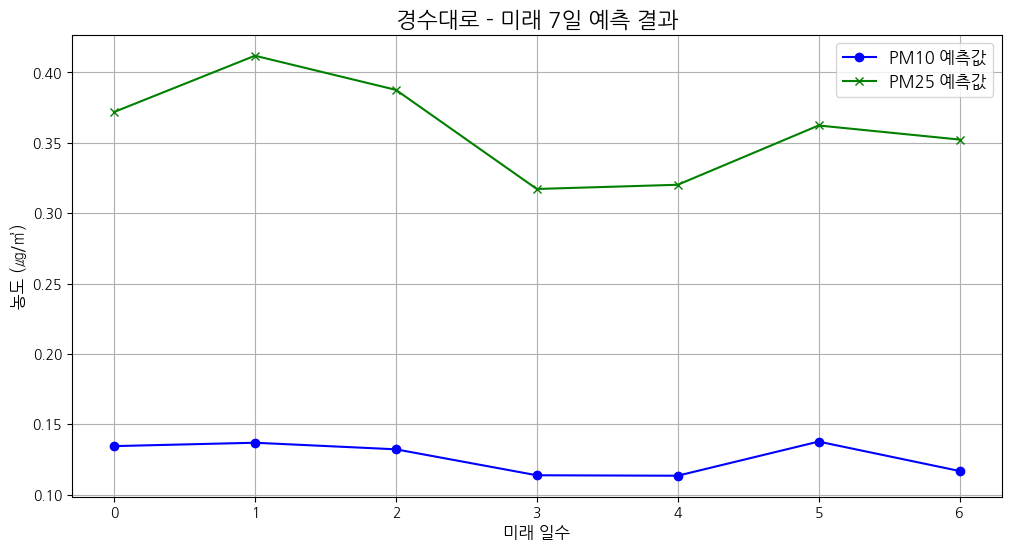

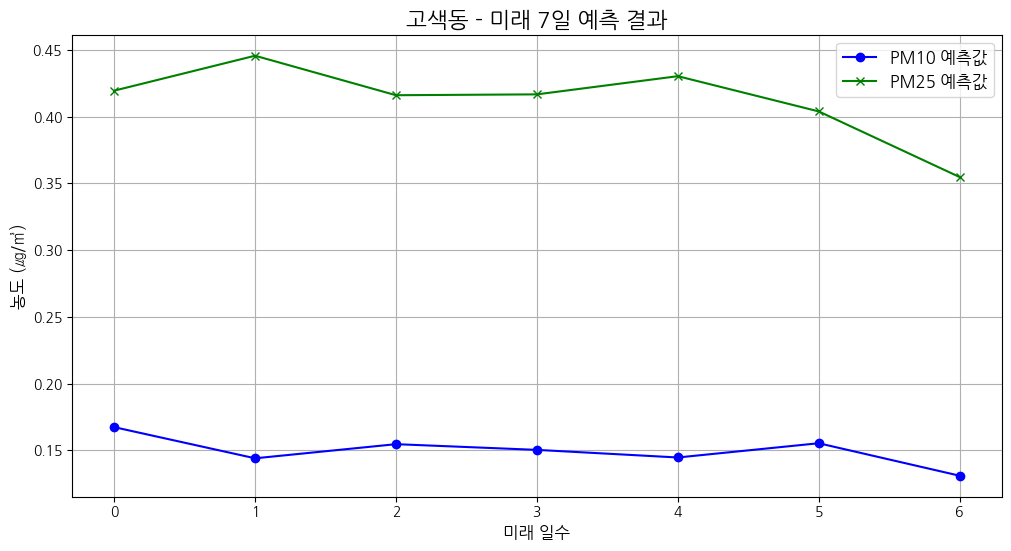

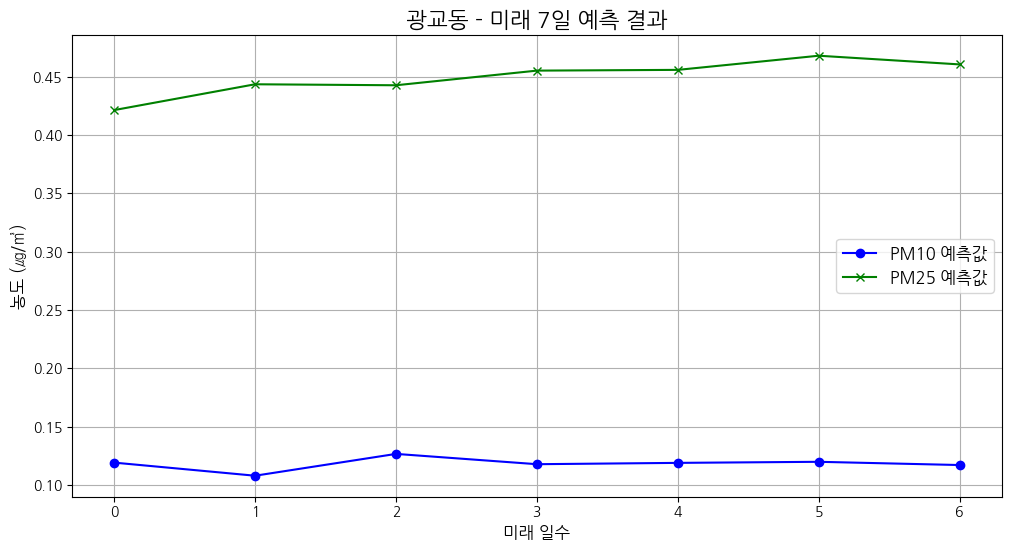

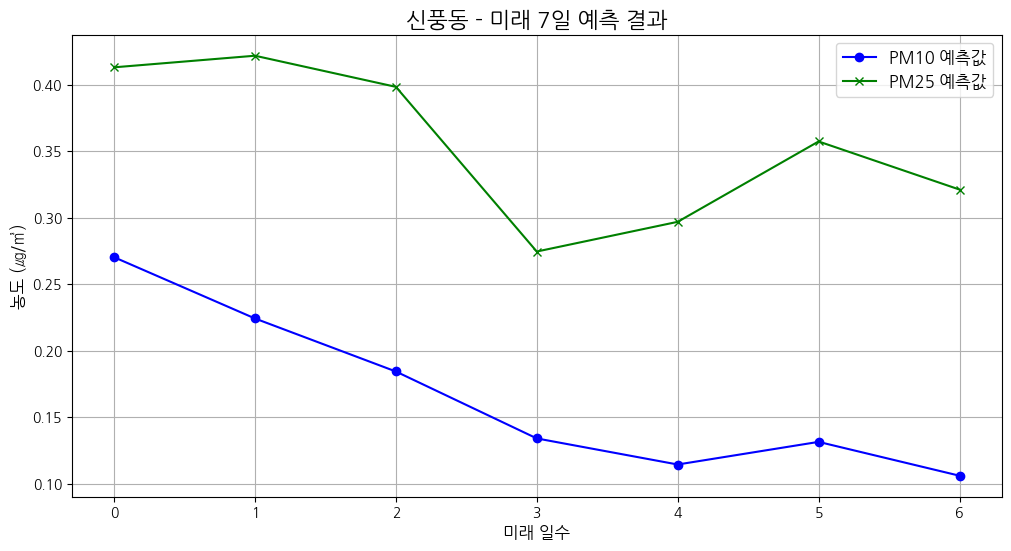

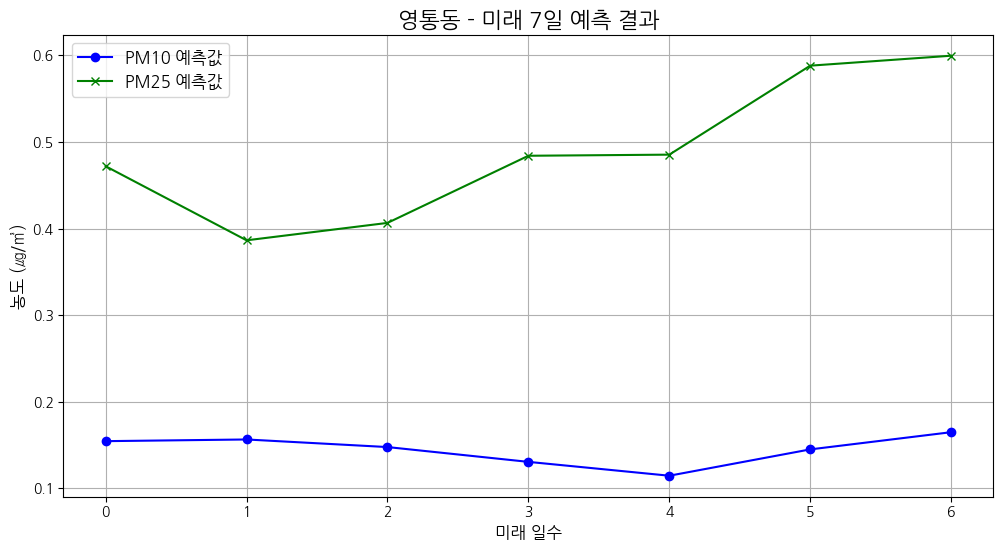

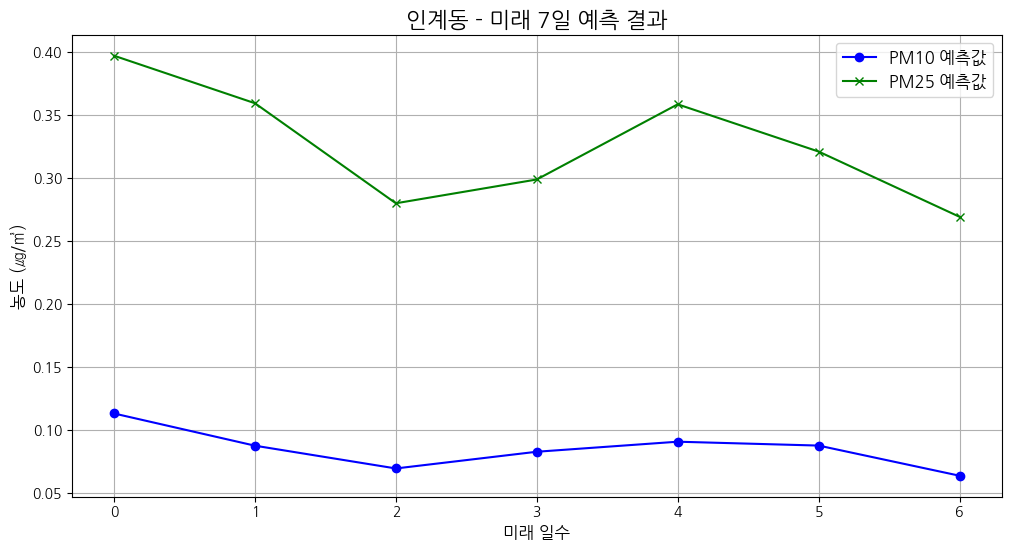

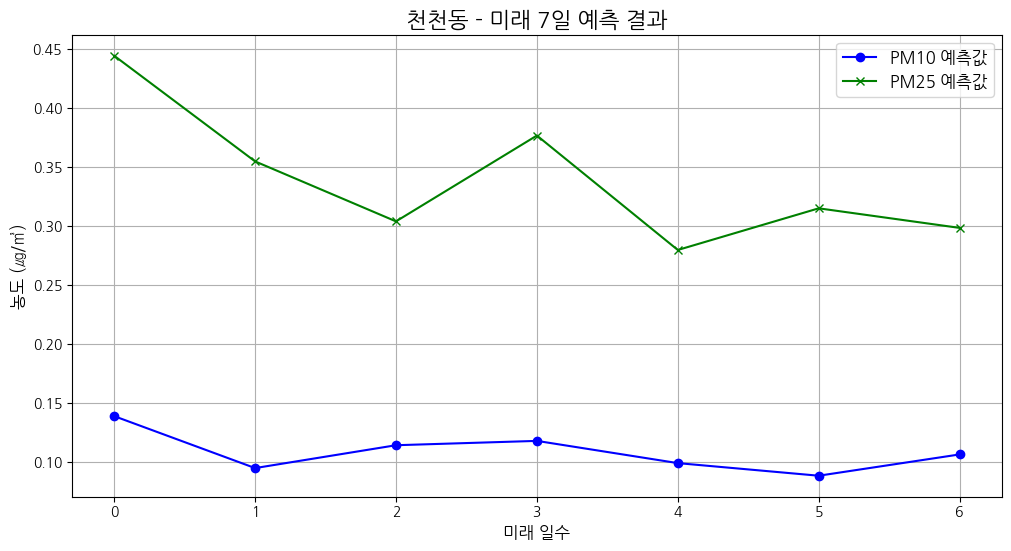

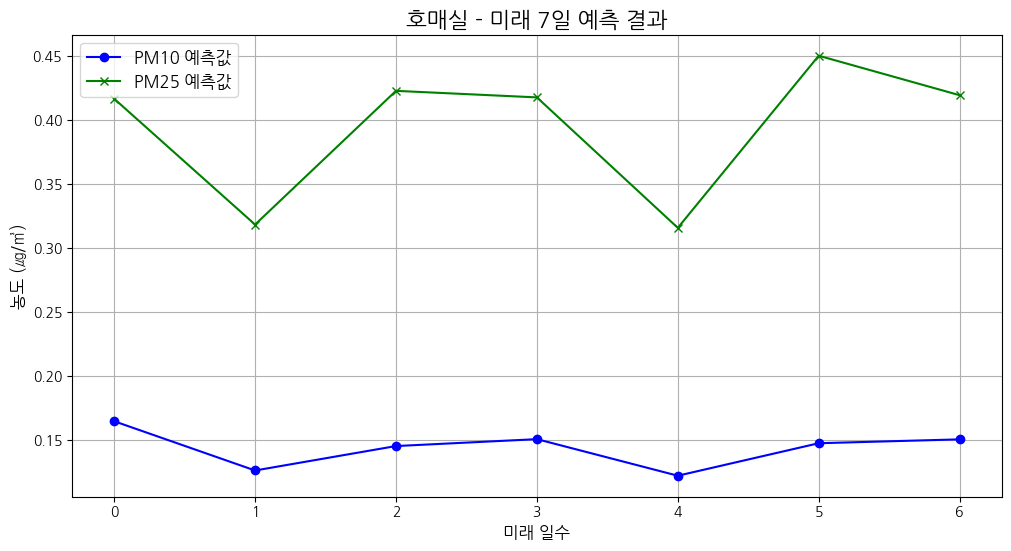

In [ ]:
def visualize_future_predictions(location, predictions, future_days):
    """
    측정 장소별 미래 예측 결과 시각화
    Args:
        location: 측정 장소명
        predictions: 미래 예측 결과 딕셔너리
        future_days: 예측할 미래 일수
    """
    plt.figure(figsize=(12, 6))
    plt.plot(range(future_days), predictions['PM10_Predictions'], label='PM10 예측값', color='blue', marker='o')
    plt.plot(range(future_days), predictions['PM25_Predictions'], label='PM25 예측값', color='green', marker='x')
    plt.title(f'{location} - 미래 {future_days}일 예측 결과', fontsize=16)
    plt.xlabel('미래 일수', fontsize=12)
    plt.ylabel('농도 (㎍/㎥)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# 시각화 실행
for location, predictions in future_predictions.items():
    visualize_future_predictions(location, predictions, future_days)


In [ ]:
import pandas as pd

# 미래 예측 결과를 데이터프레임으로 변환
average_predictions = []

for location, predictions in future_predictions.items():
    avg_pm10 = sum(predictions['PM10_Predictions']) / len(predictions['PM10_Predictions'])
    avg_pm25 = sum(predictions['PM25_Predictions']) / len(predictions['PM25_Predictions'])
    average_predictions.append({'측정장소명': location, '평균_PM10': avg_pm10, '평균_PM25': avg_pm25})

# 데이터프레임 생성
average_df = pd.DataFrame(average_predictions)

# PM10 평균값 기준 상위 3개 장소
top3_pm10 = average_df.nlargest(3, '평균_PM10')

# PM25 평균값 기준 상위 3개 장소
top3_pm25 = average_df.nlargest(3, '평균_PM25')

# 결과 출력
print("PM10 평균값 기준 상위 3개 장소:")
print(top3_pm10)

print("\nPM25 평균값 기준 상위 3개 장소:")
print(top3_pm25)


PM10 평균값 기준 상위 3개 장소:
  측정장소명   평균_PM10   평균_PM25
3   신풍동  0.166518  0.354863
1   고색동  0.149662  0.412310
4   영통동  0.144723  0.488830

PM25 평균값 기준 상위 3개 장소:
  측정장소명   평균_PM10   평균_PM25
4   영통동  0.144723  0.488830
2   광교동  0.118196  0.449483
1   고색동  0.149662  0.412310


#XGBRegressor



In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# 측정 장소별 학습 및 평가 결과 저장
xgb_results = {}

# 측정 장소별로 데이터 그룹화 및 학습
for location in suwon_data['측정장소명'].unique():
    print(f"\n[측정장소: {location}]")

    # 특정 측정 장소 데이터 필터링
    location_data = suwon_data[suwon_data['측정장소명'] == location]

    # 필요한 컬럼만 선택
    data = location_data[['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']].values

    # 시계열 데이터 생성
    seq_length = 3  # 시계열 길이
    X, y_pm10, y_pm25 = [], [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])  # 입력 데이터
        y_pm10.append(data[i, 0])  # PM10 타겟
        y_pm25.append(data[i, 1])  # PM25 타겟

    X = np.array(X)
    y_pm10 = np.array(y_pm10)
    y_pm25 = np.array(y_pm25)

    # 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_pm10_train, y_pm10_test = y_pm10[:train_size], y_pm10[train_size:]
    y_pm25_train, y_pm25_test = y_pm25[:train_size], y_pm25[train_size:]

    # 2차원 형태로 변환 (XGBoost는 2D 입력만 허용)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # XGBoost 학습 (PM10)
    xgb_pm10 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_pm10.fit(X_train_flat, y_pm10_train)
    y_pm10_pred = xgb_pm10.predict(X_test_flat)
    rmse_pm10 = np.sqrt(mean_squared_error(y_pm10_test, y_pm10_pred))

    # XGBoost 학습 (PM25)
    xgb_pm25 = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
    xgb_pm25.fit(X_train_flat, y_pm25_train)
    y_pm25_pred = xgb_pm25.predict(X_test_flat)
    rmse_pm25 = np.sqrt(mean_squared_error(y_pm25_test, y_pm25_pred))

    # 결과 저장
    xgb_results[location] = {
        'PM10_RMSE': rmse_pm10,
        'PM25_RMSE': rmse_pm25,
        'PM10_Test': y_pm10_test,
        'PM10_Pred': y_pm10_pred,
        'PM25_Test': y_pm25_test,
        'PM25_Pred': y_pm25_pred,
    }

    print(f"PM10 RMSE: {rmse_pm10:.4f}")
    print(f"PM25 RMSE: {rmse_pm25:.4f}")



[측정장소: 경수대로]
PM10 RMSE: 0.1011
PM25 RMSE: 0.2287

[측정장소: 고색동]
PM10 RMSE: 0.1245
PM25 RMSE: 0.2117

[측정장소: 광교동]
PM10 RMSE: 0.0789
PM25 RMSE: 0.2383

[측정장소: 신풍동]
PM10 RMSE: 0.1001
PM25 RMSE: 0.2234

[측정장소: 영통동]
PM10 RMSE: 0.1025
PM25 RMSE: 0.1941

[측정장소: 인계동]
PM10 RMSE: 0.0974
PM25 RMSE: 0.2275

[측정장소: 천천동]
PM10 RMSE: 0.0992
PM25 RMSE: 0.2154

[측정장소: 호매실]
PM10 RMSE: 0.0962
PM25 RMSE: 0.1769


In [ ]:
future_days = 7  # 예측할 미래 일수

# 각 측정 장소별 미래 예측 결과 저장
future_predictions = {}

for location in suwon_data['측정장소명'].unique():
    print(f"\n[측정장소: {location}]")

    # 특정 측정 장소 데이터 필터링
    location_data = suwon_data[suwon_data['측정장소명'] == location]

    # 필요한 컬럼만 선택
    data = location_data[['PM10측정값(㎍/㎥)', 'PM25측정값(㎍/㎥)']].values

    # 시계열 데이터 생성
    seq_length = 3  # 시계열 길이
    X, y_pm10, y_pm25 = [], [], []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i])  # 입력 데이터
        y_pm10.append(data[i, 0])  # PM10 타겟
        y_pm25.append(data[i, 1])  # PM25 타겟

    X = np.array(X)
    y_pm10 = np.array(y_pm10)
    y_pm25 = np.array(y_pm25)

    # 데이터 분리
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_pm10_train, y_pm10_test = y_pm10[:train_size], y_pm10[train_size:]
    y_pm25_train, y_pm25_test = y_pm25[:train_size], y_pm25[train_size:]

    # 2차원 형태로 변환 (RandomForest는 2D 입력만 허용)
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)

    # XGBRegressor 학습 (PM10)
    rf_pm10 = XGBRegressor(n_estimators=100, random_state=42)
    rf_pm10.fit(X_train_flat, y_pm10_train)

    # XGBRegressor 학습 (PM25)
    rf_pm25 = XGBRegressor(n_estimators=100, random_state=42)
    rf_pm25.fit(X_train_flat, y_pm25_train)

    # 미래 예측
    recent_data = X_test_flat[-1:]  # 테스트 데이터의 마지막 샘플 사용
    future_pm10 = []
    future_pm25 = []

    for _ in range(future_days):
        # PM10 예측
        next_pm10 = rf_pm10.predict(recent_data)[0]
        future_pm10.append(next_pm10)

        # PM25 예측
        next_pm25 = rf_pm25.predict(recent_data)[0]
        future_pm25.append(next_pm25)

        # 새로운 예측 값을 추가하여 시계열 데이터를 업데이트
        new_data = np.array([next_pm10, next_pm25]).reshape(1, -1)
        recent_data = np.hstack((recent_data[:, 2:], new_data))

    # 결과 저장
    future_predictions[location] = {
        'PM10_Predictions': future_pm10,
        'PM25_Predictions': future_pm25
    }

    print(f"미래 {future_days}일 PM10 예측값:", future_pm10)
    print(f"미래 {future_days}일 PM25 예측값:", future_pm25)



[측정장소: 경수대로]
미래 7일 PM10 예측값: [0.13774155, 0.1289777, 0.1461745, 0.16058381, 0.13464715, 0.1411174, 0.1675918]
미래 7일 PM25 예측값: [0.461557, 0.57431465, 0.67561436, 0.5395387, 0.5132476, 0.61792684, 0.620616]

[측정장소: 고색동]
미래 7일 PM10 예측값: [0.17611794, 0.1538297, 0.12837583, 0.12931766, 0.11644942, 0.1540801, 0.17430912]
미래 7일 PM25 예측값: [0.44042408, 0.41572505, 0.3780629, 0.37834114, 0.40617612, 0.48118228, 0.448625]

[측정장소: 광교동]
미래 7일 PM10 예측값: [0.080065355, 0.071497776, 0.121015854, 0.10683982, 0.08819034, 0.094114766, 0.0993578]
미래 7일 PM25 예측값: [0.4470975, 0.2748903, 0.37428808, 0.5524627, 0.5195585, 0.4406281, 0.43771315]

[측정장소: 신풍동]
미래 7일 PM10 예측값: [0.17993009, 0.17760044, 0.12561287, 0.15207396, 0.13285317, 0.12467846, 0.10079622]
미래 7일 PM25 예측값: [0.44620907, 0.29008234, 0.29424375, 0.5414601, 0.5503275, 0.46556738, 0.42372364]

[측정장소: 영통동]
미래 7일 PM10 예측값: [0.1530672, 0.15692735, 0.14775878, 0.12388013, 0.16378812, 0.16906716, 0.15000042]
미래 7일 PM25 예측값: [0.47409427, 0.3269303, 0.432

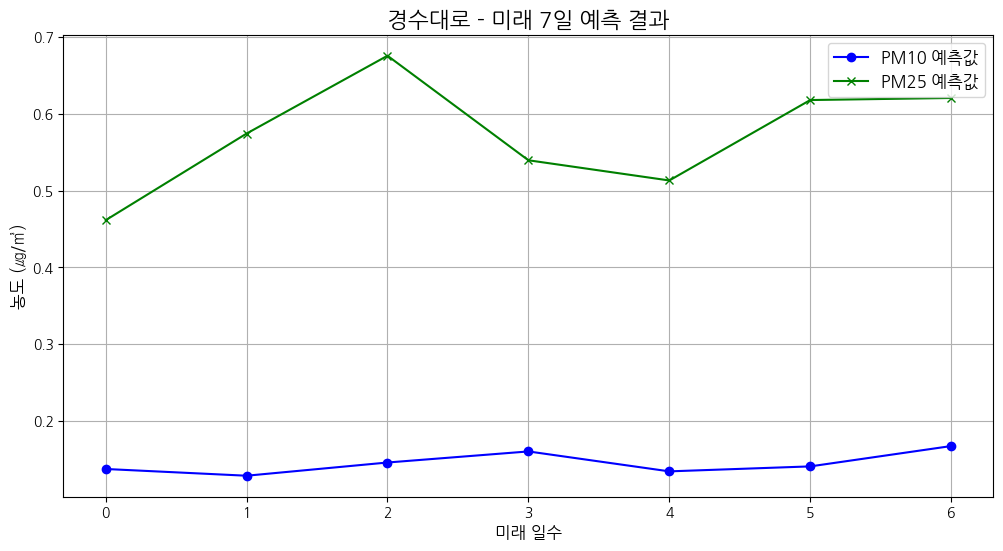

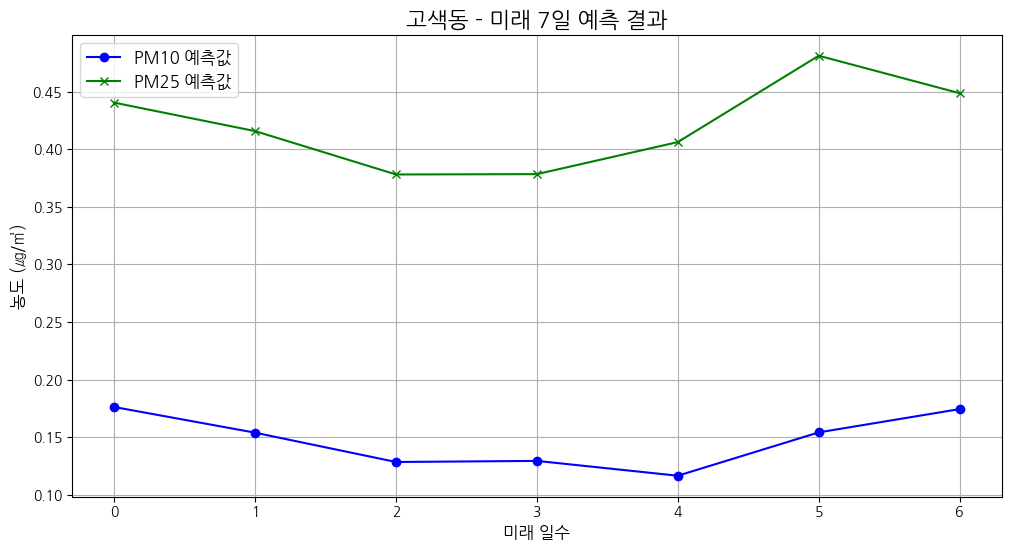

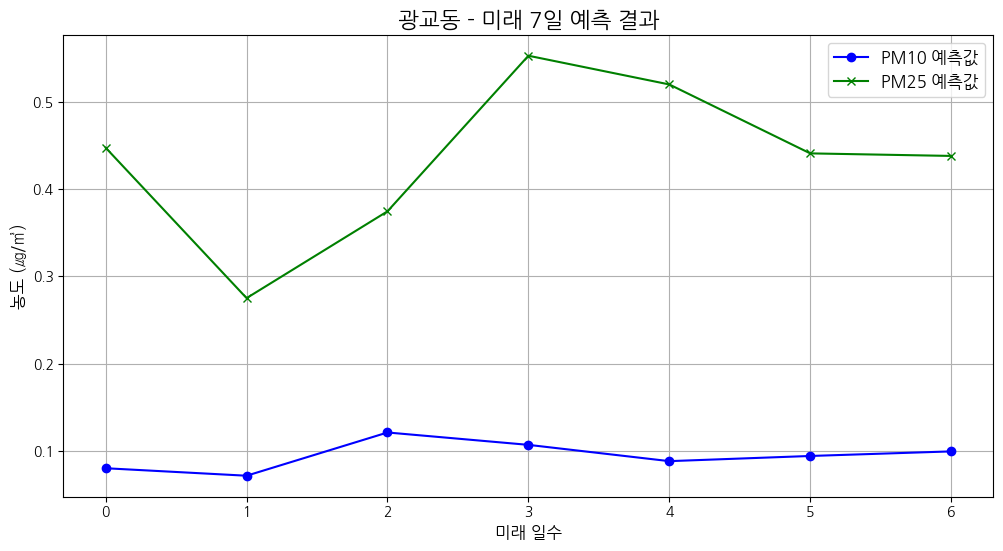

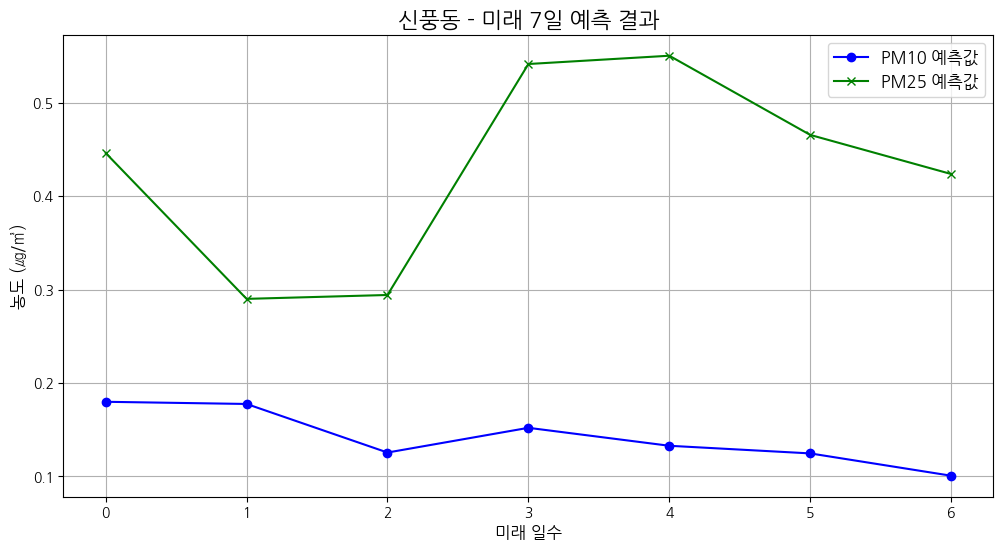

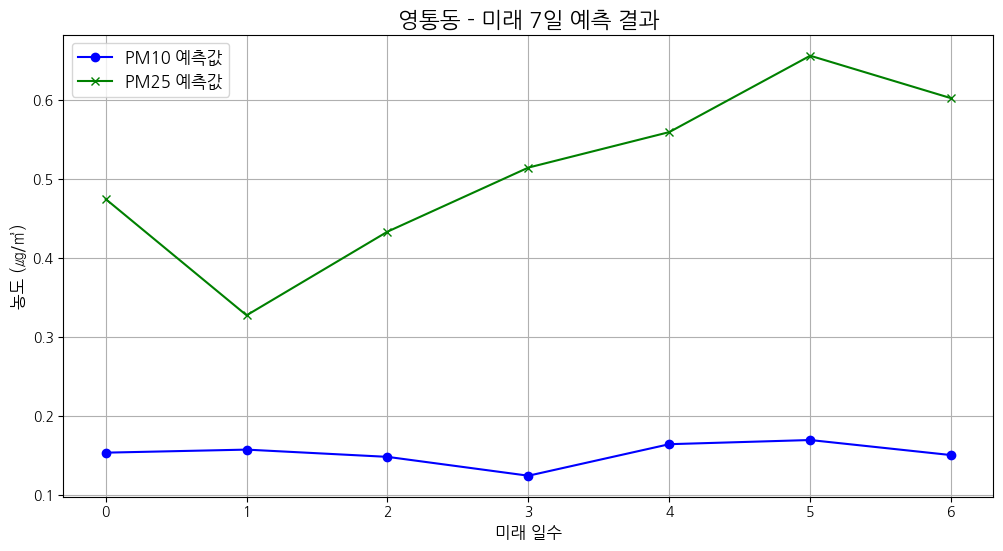

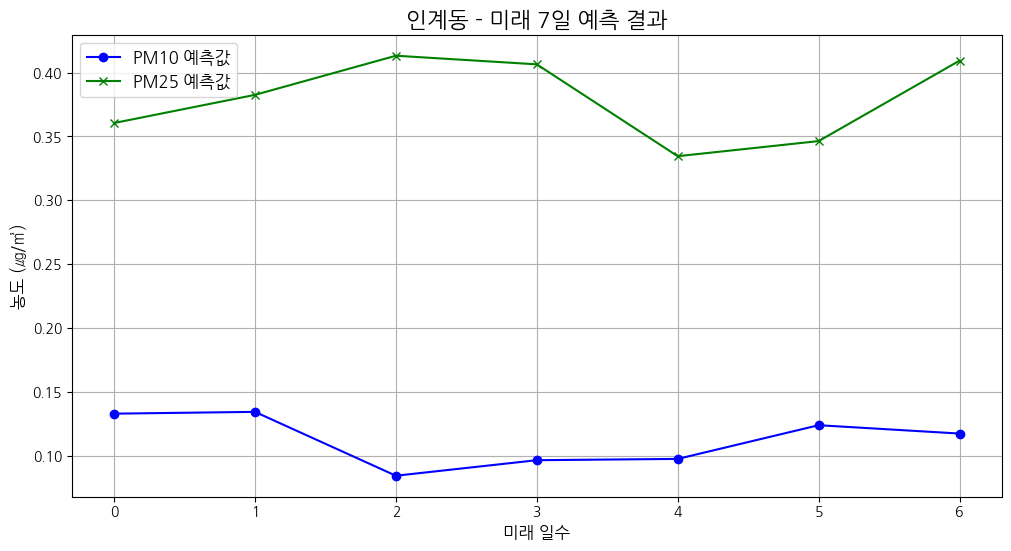

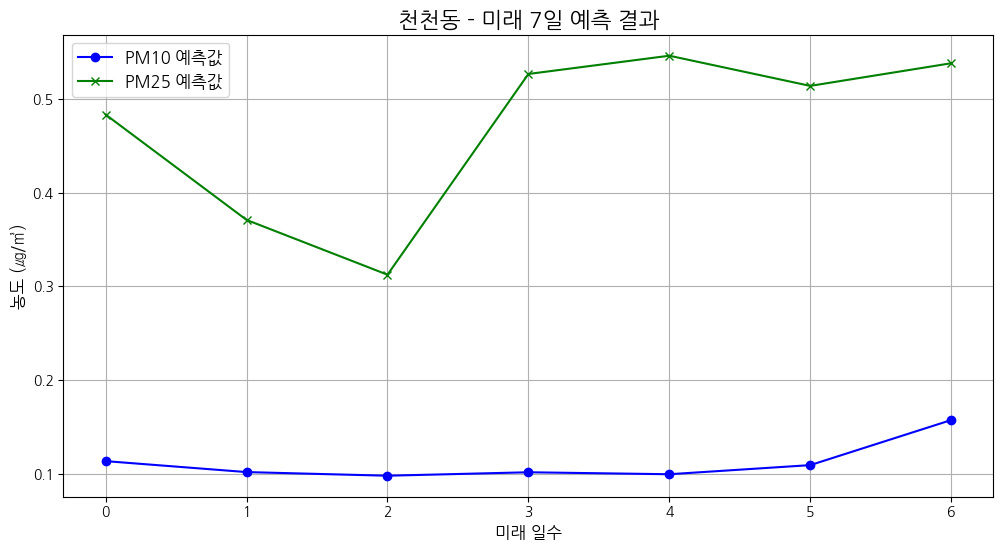

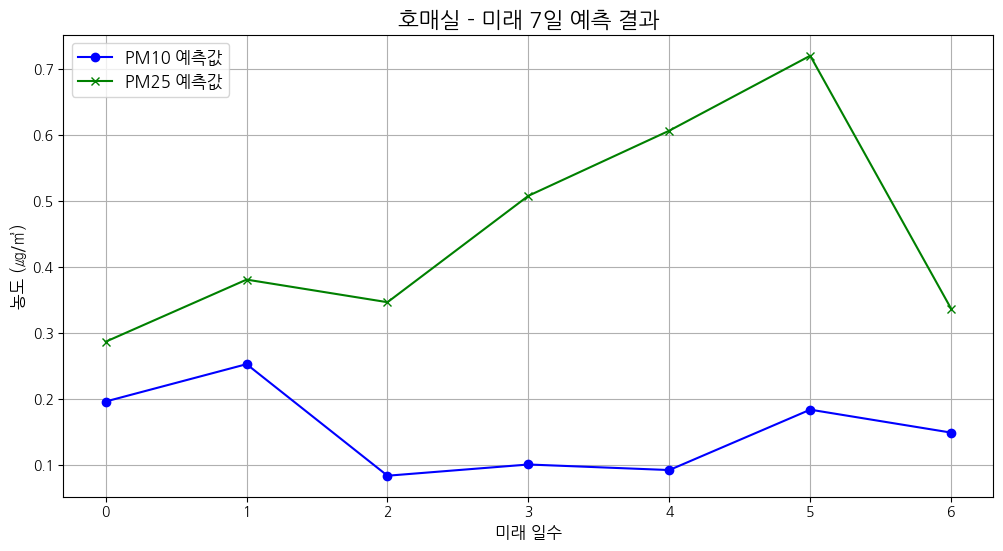

In [ ]:
def visualize_future_predictions(location, predictions, future_days):
    """
    측정 장소별 미래 예측 결과 시각화
    Args:
        location: 측정 장소명
        predictions: 미래 예측 결과 딕셔너리
        future_days: 예측할 미래 일수
    """
    plt.figure(figsize=(12, 6))
    plt.plot(range(future_days), predictions['PM10_Predictions'], label='PM10 예측값', color='blue', marker='o')
    plt.plot(range(future_days), predictions['PM25_Predictions'], label='PM25 예측값', color='green', marker='x')
    plt.title(f'{location} - 미래 {future_days}일 예측 결과', fontsize=16)
    plt.xlabel('미래 일수', fontsize=12)
    plt.ylabel('농도 (㎍/㎥)', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

# 시각화 실행
for location, predictions in future_predictions.items():
    visualize_future_predictions(location, predictions, future_days)


In [ ]:
import pandas as pd

# 미래 예측 결과를 데이터프레임으로 변환
average_predictions = []

for location, predictions in future_predictions.items():
    avg_pm10 = sum(predictions['PM10_Predictions']) / len(predictions['PM10_Predictions'])
    avg_pm25 = sum(predictions['PM25_Predictions']) / len(predictions['PM25_Predictions'])
    average_predictions.append({'측정장소명': location, '평균_PM10': avg_pm10, '평균_PM25': avg_pm25})

# 데이터프레임 생성
average_df = pd.DataFrame(average_predictions)

# PM10 평균값 기준 상위 3개 장소
top3_pm10 = average_df.nlargest(3, '평균_PM10')

# PM25 평균값 기준 상위 3개 장소
top3_pm25 = average_df.nlargest(3, '평균_PM25')

# 결과 출력
print("PM10 평균값 기준 상위 3개 장소:")
print(top3_pm10)

print("\nPM25 평균값 기준 상위 3개 장소:")
print(top3_pm25)


PM10 평균값 기준 상위 3개 장소:
  측정장소명   평균_PM10   평균_PM25
4   영통동  0.152070  0.509117
7   호매실  0.151096  0.455212
1   고색동  0.147497  0.421220

PM25 평균값 기준 상위 3개 장소:
  측정장소명   평균_PM10   평균_PM25
0  경수대로  0.145262  0.571831
4   영통동  0.152070  0.509117
6   천천동  0.111465  0.470135
